In [359]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
%matplotlib inline



In [360]:
spark = SparkSession.builder\
    .appName("popularity")\
    .getOrCreate()

In [361]:
fp_original = spark.read.csv('/Users/vvviren/Desktop/Film_Permits.csv',header='true')

In [362]:
cols = [
 'EventType',
 'StartDateTime',
 'EnteredOn',
 'EventAgency',
 'ParkingHeld',
 'Borough',
 'CommunityBoard(s)',
 'PolicePrecinct(s)',
 'Category',
 'SubCategoryName',
 'Country']
fp_original=fp_original.drop(*cols)

In [363]:
fp_original.show()

+-------+--------------------+--------------------+
|EventID|         EndDateTime|          ZipCode(s)|
+-------+--------------------+--------------------+
| 446040|10/20/2018 04:00:...|               10012|
| 446168|10/20/2018 02:00:...|        10034, 10463|
| 186438|10/31/2014 02:00:...|               11378|
| 445255|10/20/2018 06:00:...|               11201|
| 128794|11/17/2013 06:00:...|        10001, 10121|
|  43547|01/10/2012 07:00:...|        11101, 11222|
|  66846|07/27/2012 07:00:...|               11217|
| 104342|06/21/2013 09:00:...|               10036|
| 244863|09/16/2015 09:00:...|               10462|
| 446379|10/20/2018 10:00:...|               10014|
| 446359|10/20/2018 12:00:...|        10036, 10105|
| 203743|02/20/2015 07:00:...|        10014, 11101|
| 446069|10/20/2018 09:00:...|        11203, 11218|
| 445165|10/21/2018 06:00:...|        10001, 10121|
|  82397|01/07/2013 09:00:...|               11219|
| 137539|02/01/2014 06:00:...|               10001|
| 446355|10/

In [364]:
from pyspark.sql.functions import to_timestamp, year

fp = fp_original.withColumn("date", to_timestamp("EndDateTime", "MM/dd/yyyy HH:mm:ss ")).withColumn("year", year("date")).drop("EndDateTime").drop("date")
fp.show()

+-------+--------------------+----+
|EventID|          ZipCode(s)|year|
+-------+--------------------+----+
| 446040|               10012|2018|
| 446168|        10034, 10463|2018|
| 186438|               11378|2014|
| 445255|               11201|2018|
| 128794|        10001, 10121|2013|
|  43547|        11101, 11222|2012|
|  66846|               11217|2012|
| 104342|               10036|2013|
| 244863|               10462|2015|
| 446379|               10014|2018|
| 446359|        10036, 10105|2018|
| 203743|        10014, 11101|2015|
| 446069|        11203, 11218|2018|
| 445165|        10001, 10121|2018|
|  82397|               11219|2013|
| 137539|               10001|2014|
| 446355|               10036|2018|
| 446372|               11201|2018|
| 220618|               11104|2015|
| 446318|10017, 10022, 101...|2018|
+-------+--------------------+----+
only showing top 20 rows



In [365]:
from pyspark.sql.functions import explode,split


fp=fp.withColumn('tmp', split('ZipCode(s)', ', '))                                               
fp=fp.withColumn('zips', explode('tmp')).drop("tmp", "ZipCode(s)")

fp.show()

+-------+----+-----+
|EventID|year| zips|
+-------+----+-----+
| 446040|2018|10012|
| 446168|2018|10034|
| 446168|2018|10463|
| 186438|2014|11378|
| 445255|2018|11201|
| 128794|2013|10001|
| 128794|2013|10121|
|  43547|2012|11101|
|  43547|2012|11222|
|  66846|2012|11217|
| 104342|2013|10036|
| 244863|2015|10462|
| 446379|2018|10014|
| 446359|2018|10036|
| 446359|2018|10105|
| 203743|2015|10014|
| 203743|2015|11101|
| 446069|2018|11203|
| 446069|2018|11218|
| 445165|2018|10001|
+-------+----+-----+
only showing top 20 rows



In [366]:
import pyspark.sql.functions as func

fp_2012_fp = fp.filter(func.col("year") == 2012)
fp_2013_fp = fp.filter(func.col("year") == 2013)
fp_2014_fp = fp.filter(func.col("year") == 2014)
fp_2015_fp = fp.filter(func.col("year") == 2015)
fp_2016_fp = fp.filter(func.col("year") == 2016)
fp_2017_fp = fp.filter(func.col("year") == 2017)
fp_2018_fp = fp.filter(func.col("year") == 2018)
fp_2019_fp = fp.filter(func.col("year") == 2019)


fp_2012_fp = fp_2012_fp.groupby("zips").agg(func.count(func.lit(1)).alias("permits_2012")).sort("zips")
fp_2013_fp = fp_2013_fp.groupby("zips").agg(func.count(func.lit(1)).alias("permits_2013")).sort("zips")
fp_2014_fp = fp_2014_fp.groupby("zips").agg(func.count(func.lit(1)).alias("permits_2014")).sort("zips")
fp_2015_fp = fp_2015_fp.groupby("zips").agg(func.count(func.lit(1)).alias("permits_2015")).sort("zips")
fp_2016_fp = fp_2016_fp.groupby("zips").agg(func.count(func.lit(1)).alias("permits_2016")).sort("zips")
fp_2017_fp = fp_2017_fp.groupby("zips").agg(func.count(func.lit(1)).alias("permits_2017")).sort("zips")
fp_2018_fp = fp_2018_fp.groupby("zips").agg(func.count(func.lit(1)).alias("permits_2018")).sort("zips")
fp_2019_fp = fp_2019_fp.groupby("zips").agg(func.count(func.lit(1)).alias("permits_2019")).sort("zips")
fp_2012_fp.show()
fp_2013_fp.show()
fp_2014_fp.show()
fp_2015_fp.show()
fp_2016_fp.show()
fp_2017_fp.show()
fp_2018_fp.show()
fp_2019_fp.show()

+-----+------------+
| zips|permits_2012|
+-----+------------+
|    0|           6|
|00083|          34|
|10001|         297|
|10002|         244|
|10003|         270|
|10004|          98|
|10005|          98|
|10006|          20|
|10007|         135|
|10009|          69|
|10010|         172|
|10011|         288|
|10012|         235|
|10013|         359|
|10014|         273|
|10016|         115|
|10017|         157|
|10018|         135|
|10019|         545|
|10020|         131|
+-----+------------+
only showing top 20 rows

+-----+------------+
| zips|permits_2013|
+-----+------------+
|    0|           8|
|00083|          29|
|10001|         398|
|10002|         278|
|10003|         284|
|10004|          79|
|10005|          96|
|10006|          35|
|10007|         157|
|10009|         101|
|10010|         172|
|10011|         365|
|10012|         231|
|10013|         441|
|10014|         322|
|10016|         139|
|10017|         185|
|10018|         146|
|10019|         617|
|10020| 

In [367]:
high_zips = fp.groupby("zips")\
.agg(func.count(func.lit(1)).alias("permits"))\
.sort(func.col("permits").desc())\
.select("zips", "permits")\
.limit(7)

high_zips.show()

+-----+-------+
| zips|permits|
+-----+-------+
|11222|   7271|
|11101|   5694|
|10036|   4174|
|10019|   3969|
|10001|   3165|
|10013|   2998|
|10011|   2765|
+-----+-------+



In [368]:
# fp_2012_fp.join(high_zips, fp_2012_fp["zips"]==high_zips["zips"]).drop(high_zips.zips).sort("zips").show()
# fp_2013_fp.join(high_zips, fp_2013_fp["zips"]==high_zips["zips"]).drop(high_zips.zips).sort("zips").show()
# fp_2014_fp.join(high_zips, fp_2014_fp["zips"]==high_zips["zips"]).drop(high_zips.zips).sort("zips").show()
# fp_2015_fp.join(high_zips, fp_2015_fp["zips"]==high_zips["zips"]).drop(high_zips.zips).sort("zips").show()
# fp_2016_fp.join(high_zips, fp_2016_fp["zips"]==high_zips["zips"]).drop(high_zips.zips).sort("zips").show()
# fp_2017_fp.join(high_zips, fp_2017_fp["zips"]==high_zips["zips"]).drop(high_zips.zips).sort("zips").show()
# fp_2018_fp.join(high_zips, fp_2018_fp["zips"]==high_zips["zips"]).drop(high_zips.zips).sort("zips").show()
# fp_2019_fp.join(high_zips, fp_2019_fp["zips"]==high_zips["zips"]).drop(high_zips.zips).sort("zips").show()

In [369]:
import pyspark.sql.functions as f

fp_season = fp_original.withColumn("date", f.to_timestamp("EndDateTime", "MM/dd/yyyy HH:mm:ss ")).withColumn("dayOfYear", f.dayofyear("date")).drop("EndDateTime").drop("date")


In [370]:
def get_season(day):
    spring = range(79, 172)
    summer = range(173, 264)
    fall = range(265, 355)
    
    
    #return corresponding season
    if day in spring:
        return 'Spring'
    elif day in summer:
        return 'Summer'
    elif day in fall:
        return 'Autumn'
    else:
        return 'Winter'

getSeasonUDF= f.udf(lambda day : get_season(day),StringType())

fp_season = fp_season.withColumn("season", getSeasonUDF(f.col("dayOfYear"))).drop(f.col("dayOfYear"))


In [371]:
fp_season=fp_season.withColumn('tmp', f.split('ZipCode(s)', ', '))                                               
fp_season=fp_season.withColumn('zips', f.explode('tmp')).drop("tmp", "ZipCode(s)")
fp_season=fp_season.filter(f.col("zips")>=10001)


fp_season.show()

+-------+------+-----+
|EventID|season| zips|
+-------+------+-----+
| 446040|Autumn|10012|
| 446168|Autumn|10034|
| 446168|Autumn|10463|
| 186438|Autumn|11378|
| 445255|Autumn|11201|
| 128794|Autumn|10001|
| 128794|Autumn|10121|
|  43547|Winter|11101|
|  43547|Winter|11222|
|  66846|Summer|11217|
| 104342|Winter|10036|
| 244863|Summer|10462|
| 446379|Autumn|10014|
| 446359|Autumn|10036|
| 446359|Autumn|10105|
| 203743|Winter|10014|
| 203743|Winter|11101|
| 446069|Autumn|11203|
| 446069|Autumn|11218|
| 445165|Autumn|10001|
+-------+------+-----+
only showing top 20 rows



In [372]:
fp_season = fp_season.groupby("zips", "season").count()
fp_season = fp_season.groupby("zips").pivot("season").max("count").fillna(0)
fp_season.show()


+-----+------+------+------+------+
| zips|Autumn|Spring|Summer|Winter|
+-----+------+------+------+------+
|10309|    28|    38|    46|    19|
|11205|   305|   195|   286|   162|
|11236|     1|     5|     7|     3|
|11106|   558|   256|   468|   299|
|11251|    29|    33|    25|    11|
|10110|     6|     6|     2|     1|
|11218|   102|   143|   146|    62|
|10452|    50|    49|    54|    12|
|11428|     1|     0|     0|     2|
|10177|    11|    12|     2|     8|
|11237|   389|   220|   352|   227|
|11379|    27|    32|    33|    15|
|11364|    13|     6|     8|    13|
|11109|    53|    22|    38|    21|
|11249|   466|   404|   462|   234|
|10012|   474|   607|   530|   365|
|11001|     2|     2|     1|     0|
|10039|    32|    24|    16|     8|
|11238|   193|   154|   235|   104|
|11385|   392|   178|   320|   272|
+-----+------+------+------+------+
only showing top 20 rows



In [373]:
fp_high_season = fp_season.join(high_zips, "zips").drop(high_zips.zips).sort(f.col("permits").desc())
fp_high_season.show()

+-----+------+------+------+------+-------+
| zips|Autumn|Spring|Summer|Winter|permits|
+-----+------+------+------+------+-------+
|11222|  2214|  1437|  2022|  1598|   7271|
|11101|  1709|  1107|  1645|  1233|   5694|
|10036|   975|  1252|  1245|   702|   4174|
|10019|  1156|  1174|   867|   772|   3969|
|10001|   856|   950|   758|   601|   3165|
|10013|   793|   855|   787|   563|   2998|
|10011|   726|   756|   746|   537|   2765|
+-----+------+------+------+------+-------+



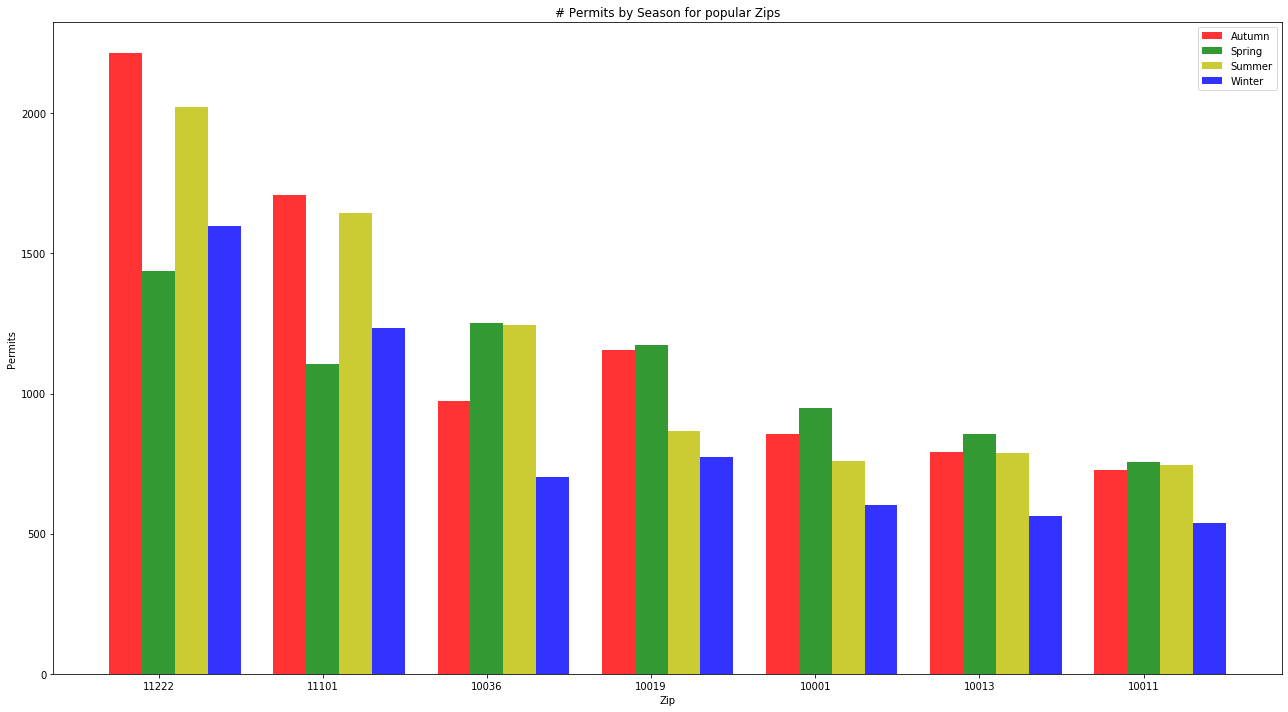

In [377]:
fp_high_pd=fp_high_season.toPandas()


import numpy as np
import matplotlib.pyplot as plt

zl = fp_high_pd["zips"].tolist()
# data to plot
n_groups = 7
a = fp_high_pd["Autumn"]
s = fp_high_pd["Spring"]
sm =fp_high_pd["Summer"]
w = fp_high_pd["Winter"]


# create plot
fig, ax = plt.subplots(figsize=(18,10))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, a, bar_width,
alpha=opacity,
color='r',
label='Autumn')

rects2 = plt.bar(index + bar_width, s, bar_width,
alpha=opacity,
color='g',
label='Spring')

rects3 = plt.bar(index + (2*bar_width), sm, bar_width,
alpha=opacity,
color='y',
label='Summer')

rects4 = plt.bar(index + (3*bar_width), w, bar_width,
alpha=opacity,
color='b',
label='Winter')

plt.xlabel('Zip')
plt.ylabel('Permits')
plt.title('# Permits by Season for popular Zips')
plt.xticks(index + bar_width, (zl[0], zl[1], zl[2], zl[3], zl[4], zl[5], zl[6]))
plt.legend()

plt.tight_layout()
plt.show()